# **Personnel Scheduling:**

UNION AIRWAYS is adding more flights to and from its hub airport, and so it needs to hire additional customer service agents. However, it is not clear just how many more should be hired. Management recognizes the need for cost control while also consistently providing a satisfactory level of service to customers. Therefore, an OR team is studying how to schedule the agents to provide satisfactory service with the smallest personnel cost.

Based on the new schedule of flights, an analysis has been made of the minimum number of customer service agents that need to be on duty at different times of the day to provide a satisfactory level of service. The rightmost column of Table 3.19 shows the number of agents needed for the time periods given in the first column. The other entries in this table reflect one of the provisions in the company's current contract with the union that represents the customer service agents. The provision is that each agent work an 8-hour shift 5 days per week, and the authorized shifts are

Shift 1: 6:00 A.M. to 2:00 P.M.

Shift 2: 8:00 A.M. to 4:00 P.M.

Shift 3: 12:00 A.M. (noon) to 8:00 P.M.

Shift 4: 4:00 P.M. to 12:00 P.M. (midnight)

Shift 5: 10:00 P.M. to 6:00 A.M.

Checkmarks in the main body of Table 3.19 show the hours covered by the respective shifts. Because some shifts are less desirable than others, the wages specified in the contract differ by shift. For each shift, the daily compensation (including benefits) for each agent is shown in the bottom row. The problem is to determine how many agents should be assigned to the respective shifts each day to minimize the total personnel cost for agents, based on this bottom row, while meeting (or surpassing) the service requirements given in the rightmost column.


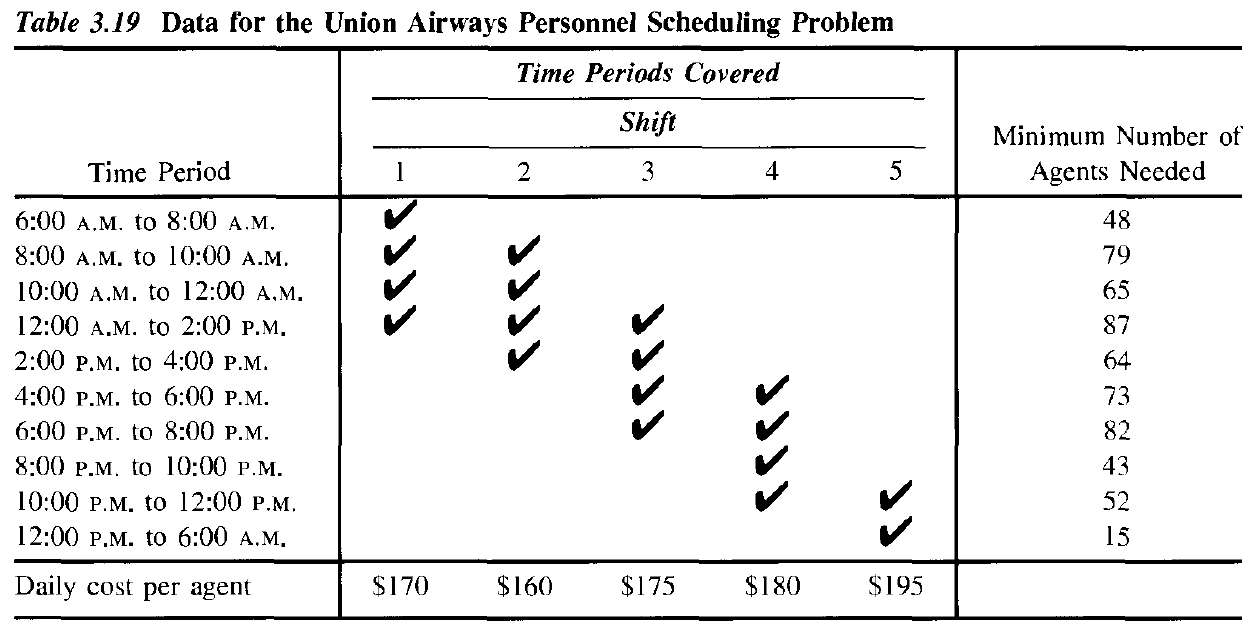

**Modeling:**

$x_{j} \qquad  j\in {1,2,3,4,5} \quad $   number of agents assigned to shift $j$

$\\ $

$Objective\ Function:\\ $

$Min\ Z = 170x_1 + 160x_2 + 175x_3 + 180x_4 + 195x_5$

$\\ $

$Constraints:\\ $

$x_1 \geq 48 \qquad \qquad (6\text{-}8 \text{ A.M.})$

$x_1 + x_2 \geq 79 \qquad (8\text{-}10 \text{ A.M.})$
    
$x_1 + x_2 \geq 65 \qquad (10\text{-}12 \text{ A.M.})$

$x_1 + x_2 + x_3 \geq 87 \qquad (12 \text{ A.M. - } 2 \text{ P.M.})$
    
$x_2 + x_3 \geq 64 \qquad (2\text{-}4 \text{ P.M.})$

$x_3 + x_4 \geq 73 \qquad (4\text{-}6 \text{ P.M.})$

$x_3 + x_4 \geq 82 \qquad (6\text{-}8 \text{ P.M.})$

$x_4 \geq 43 \qquad \qquad (8\text{-}10 \text{ P.M.})$

$x_4 + x_5 \geq 52 \qquad (10\text{-}12 \text{ P.M.})$

$x_5 \geq 15 \qquad \qquad (12 \text{ P.M. - } 6 \text{ A.M.})$

$x_{j} \in 0,1$

## Using Pulp Library

In [1]:
!pip install pulp
from pulp import *
import numpy as np
import pandas as pd

In [2]:
# Defining Variables

x = LpVariable.dicts("x", (i for i in range(1, 6)), lowBound=0, cat="Integer")

In [3]:
# Defining Objective Function

model = LpProblem('model', LpMinimize)

model += 170 * x[1] + 160 * x[2] + 175 * x[3] + 180 * x[4] + 195 * x[5], "Total Personnel Cost"

In [4]:
# Constraints

model += x[1] >= 48, "Shift 1 (6-8 AM)"
model += x[1] + x[2] >= 79, "Shift 1 and 2 (8-10 AM)"
model += x[1] + x[2] >= 65, "Shift 1 and 2 (10-12 AM)"
model += x[1] + x[2] + x[3] >= 87, "Shift 1, 2 and 3 (12 AM - 2 PM)"
model += x[2] + x[3] >= 64, "Shift 2 and 3 (2-4 PM)"
model += x[3] + x[4] >= 73, "Shift 3 and 4 (4-6 PM)"
model += x[3] + x[4] >= 82, "Shift 3 and 4 (6-8 PM)"
model += x[4] >= 43, "Shift 4 (8-10 PM)"
model += x[4] + x[5] >= 52, "Shift 4 and 5 (10-12 PM)"
model += x[5] >= 15, "Shift 5 (12 PM - 6 AM)"

In [5]:
#Model summary

model

model:
MINIMIZE
170*x_1 + 160*x_2 + 175*x_3 + 180*x_4 + 195*x_5 + 0
SUBJECT TO
Shift_1_(6_8_AM): x_1 >= 48

Shift_1_and_2_(8_10_AM): x_1 + x_2 >= 79

Shift_1_and_2_(10_12_AM): x_1 + x_2 >= 65

Shift_1,_2_and_3_(12_AM___2_PM): x_1 + x_2 + x_3 >= 87

Shift_2_and_3_(2_4_PM): x_2 + x_3 >= 64

Shift_3_and_4_(4_6_PM): x_3 + x_4 >= 73

Shift_3_and_4_(6_8_PM): x_3 + x_4 >= 82

Shift_4_(8_10_PM): x_4 >= 43

Shift_4_and_5_(10_12_PM): x_4 + x_5 >= 52

Shift_5_(12_PM___6_AM): x_5 >= 15

VARIABLES
0 <= x_1 Integer
0 <= x_2 Integer
0 <= x_3 Integer
0 <= x_4 Integer
0 <= x_5 Integer

In [6]:
#Solving model

model.solve()
print('Optimal Solution:', pulp.value(model.objective))

Optimal Solution: 30610.0


In [7]:
for variables in model.variables():
  print(f'{variables.name}:{variables.varValue}')

x_1:48.0
x_2:31.0
x_3:39.0
x_4:43.0
x_5:15.0


In [8]:
VNames = []
for variables in model.variables():
  VNames.append(variables.name)

VValue = []
for variables in model.variables():
  VValue.append(np.round(variables.varValue, 2))

data = {'Variables': VNames, 'Value': VValue}
pd.DataFrame(data, index = range(1, len(VValue)+1))

,Variables,Value
1,x_1,48.0
2,x_2,31.0
3,x_3,39.0
4,x_4,43.0
5,x_5,15.0


In [9]:
print('Current Status: ', LpStatus[model.status])

Current Status:  Optimal


## Using Pyomo Library

In [10]:
!pip install pyomo
!apt-get install -y -qq glpk-utils

from pyomo.environ import *

In [13]:
from pyomo.environ import ConcreteModel, Var, Objective, Constraint, NonNegativeIntegers, SolverFactory

# Create a ConcreteModel
model = ConcreteModel()

# Define the sets
model.shifts = range(1, 6)  # Shifts 1 to 5

# Define the decision variables
model.x = Var(model.shifts, domain=NonNegativeIntegers)

# Objective function coefficients (cost per shift)
cost = {1: 170, 2: 160, 3: 175, 4: 180, 5: 195}

# Define the objective function
def objective_rule(model):
    return sum(cost[j] * model.x[j] for j in model.shifts)

model.objective = Objective(rule=objective_rule, sense=1)  # Minimize cost

# Constraints
model.constraint1 = Constraint(expr=model.x[1] >= 48)  # Shift 1 (6-8 AM)
model.constraint2 = Constraint(expr=model.x[1] + model.x[2] >= 79)  # Shift 1 and 2 (8-10 AM)
model.constraint3 = Constraint(expr=model.x[1] + model.x[2] >= 65)  # Shift 1 and 2 (10-12 AM)
model.constraint4 = Constraint(expr=model.x[1] + model.x[2] + model.x[3] >= 87)  # Shift 1, 2, and 3 (12 AM - 2 PM)
model.constraint5 = Constraint(expr=model.x[2] + model.x[3] >= 64)  # Shift 2 and 3 (2-4 PM)
model.constraint6 = Constraint(expr=model.x[3] + model.x[4] >= 73)  # Shift 3 and 4 (4-6 PM)
model.constraint7 = Constraint(expr=model.x[3] + model.x[4] >= 82)  # Shift 3 and 4 (6-8 PM)
model.constraint8 = Constraint(expr=model.x[4] >= 43)  # Shift 4 (8-10 PM)
model.constraint9 = Constraint(expr=model.x[4] + model.x[5] >= 52)  # Shift 4 and 5 (10-12 PM)
model.constraint10 = Constraint(expr=model.x[5] >= 15)  # Shift 5 (12 PM - 6 AM)

# Solve the model
solver = SolverFactory('glpk')  # Choose an appropriate solver, e.g., GLPK or CBC
result = solver.solve(model)

# Print the results
print(f"Status: {result.solver.status}")
print("\nOptimal number of agents to assign to each shift:")
for j in model.shifts:
    print(f"Shift {j}: {model.x[j].value} agents")
print(f"\nTotal Minimum Cost: ${model.objective()}\n")

model.display()

Status: ok

Optimal number of agents to assign to each shift:
Shift 1: 48.0 agents
Shift 2: 31.0 agents
Shift 3: 39.0 agents
Shift 4: 43.0 agents
Shift 5: 15.0 agents

Total Minimum Cost: $30610.0

Model unknown

  Variables:
    x : Size=5, Index={1, 2, 3, 4, 5}
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          1 :     0 :  48.0 :  None : False : False : NonNegativeIntegers
          2 :     0 :  31.0 :  None : False : False : NonNegativeIntegers
          3 :     0 :  39.0 :  None : False : False : NonNegativeIntegers
          4 :     0 :  43.0 :  None : False : False : NonNegativeIntegers
          5 :     0 :  15.0 :  None : False : False : NonNegativeIntegers

  Objectives:
    objective : Size=1, Index=None, Active=True
        Key  : Active : Value
        None :   True : 30610.0

  Constraints:
    constraint1 : Size=1
        Key  : Lower : Body : Upper
        None :  48.0 : 48.0 :  None
    constraint2 : Size=1
        Key  : Lower : Body : Upper
      